In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn  import metrics


import warnings
warnings.filterwarnings('ignore')

In [2]:
amzn_data = yf.download("AMZN", period = "15y")

[*********************100%***********************]  1 of 1 completed


In [3]:
amzn_data_cp = amzn_data.copy()

In [4]:
amzn_data_cp.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
amzn_data_cp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300
...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800


<AxesSubplot:xlabel='Date'>

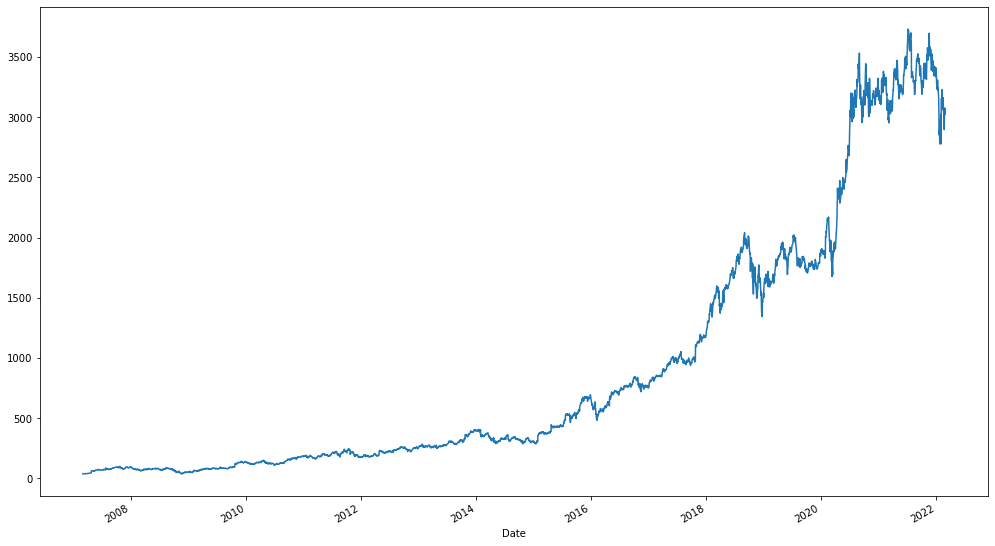

In [6]:
amzn_data_cp['Adj Close'].plot(figsize=(17, 10))

<AxesSubplot:xlabel='Date'>

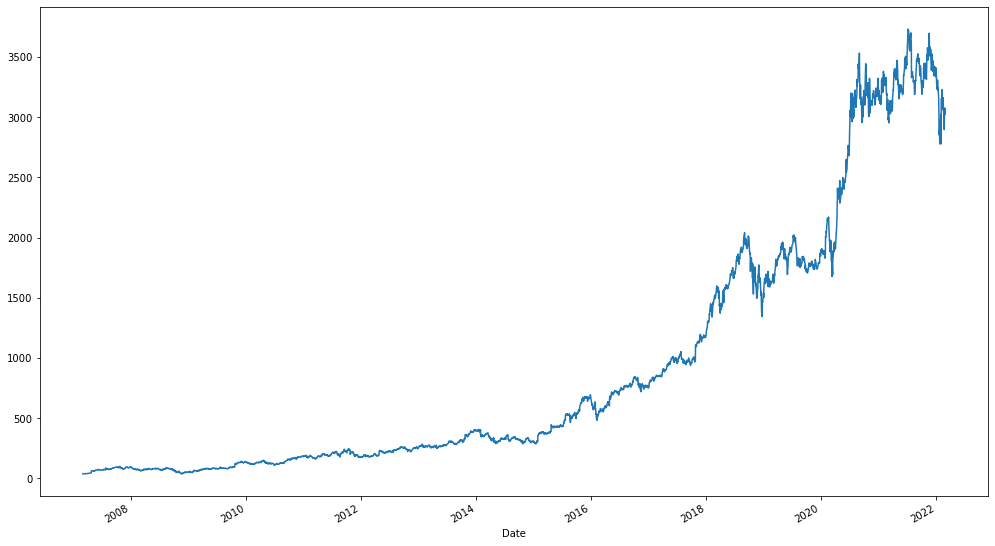

In [7]:
amzn_data_cp['Close'].plot(figsize=(17, 10))

<AxesSubplot:>

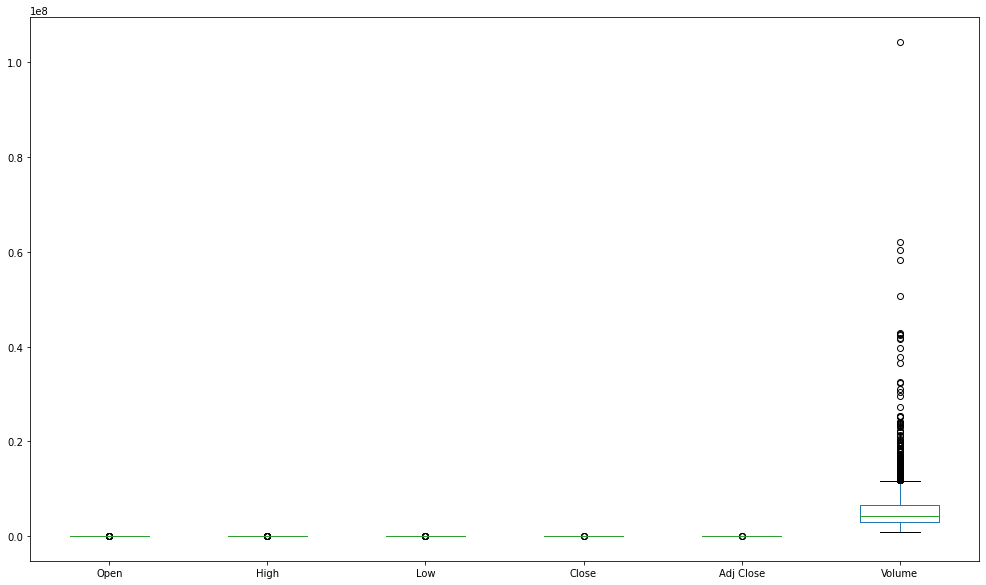

In [8]:
amzn_data_cp.plot.box(figsize=(17, 10))

# Stratgy 1

In [9]:
amzn_data_cp['amzn_bs'] = np.where(amzn_data_cp['Close'].shift(-1) > amzn_data_cp['Close'], 1, -1)
amzn_data_cp

,Open,High,Low,Close,Adj Close,Volume,amzn_bs
Date,,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800,-1
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600,1
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200,-1
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600,-1
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300,1
...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,1
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,1
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,-1


In [10]:
x = amzn_data_cp[['Open', 'High' , 'Low' , 'Close']]
x

,Open,High,Low,Close
Date,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999
2007-03-05,37.150002,38.320000,37.040001,37.049999
2007-03-06,37.689999,38.660000,37.410000,38.580002
2007-03-07,38.680000,39.320000,38.279999,38.360001
2007-03-08,38.770000,39.220001,37.980000,38.099998
...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020


In [11]:
y = amzn_data_cp[['amzn_bs']]
y

,amzn_bs
Date,
2007-03-02,-1
2007-03-05,1
2007-03-06,-1
2007-03-07,-1
2007-03-08,1
...,...
2022-02-23,1
2022-02-24,1
2022-02-25,-1


# Splitting the data into 80-20

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# KNN

In [13]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn_ft = knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [14]:
accuracy_test = metrics.accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Random Forest

In [15]:
rfc = RandomForestClassifier()

rfc_ft = rfc.fit(x_train, y_train)

y_rfc_pred = rfc.predict(x_test)

In [16]:
accuracy_test_rfc = metrics.accuracy_score(y_test, y_rfc_pred)
cm_rfc = confusion_matrix(y_test, y_rfc_pred)

# Gradient Boosting

In [17]:
gbc = GradientBoostingClassifier()

gbc_ft = gbc.fit(x_train, y_train)

y_gbc_pred = gbc.predict(x_test)

In [18]:
accuracy_test_gbc = metrics.accuracy_score(y_test, y_gbc_pred)
cm_gbc = confusion_matrix(y_test, y_gbc_pred)

# Support Vector Machine

In [19]:
svc = SVC()

svc_ft = svc.fit(x_train, y_train)

y_svc_pred = svc.predict(x_test)

In [20]:
accuracy_test_svc = metrics.accuracy_score(y_test, y_svc_pred)
cm_svc = confusion_matrix(y_test, y_svc_pred)

# XGBoost

In [21]:
xgc = XGBClassifier()

xgc_ft = xgc.fit(x_train, y_train)

y_xgc_pred = xgc.predict(x_test)

[20:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
accuracy_test_xgc = metrics.accuracy_score(y_test, y_xgc_pred)
cm_xgb = confusion_matrix(y_test, y_xgc_pred)

In [23]:
print("Accuracy Score of Knn classifier is:\n", accuracy_test)
print("Accuracy Score of Random Forest classifier is:\n", accuracy_test_rfc)
print("Accuracy Score of Gradient Boosting classifier is:\n", accuracy_test_gbc)
print("Accuracy Score of Support Vector Machine classifier is:\n", accuracy_test_svc)
print("Accuracy Score of XGBoost classifier is:\n", accuracy_test_xgc)


Accuracy Score of Knn classifier is:
 0.49867724867724866
Accuracy Score of Random Forest classifier is:
 0.5224867724867724
Accuracy Score of Gradient Boosting classifier is:
 0.4947089947089947
Accuracy Score of Support Vector Machine classifier is:
 0.5238095238095238
Accuracy Score of XGBoost classifier is:
 0.5105820105820106


In [24]:
# svm > rfc > xgb > knn > gb

In [25]:
print("Confusion Matrix of Knn:\n", cm)
print("Confusion Matrix of Rfc:\n", cm_rfc)
print("Confusion Matrix of gbc:\n", cm_gbc)
print("Confusion Matrix of svc:\n", cm_svc)
print("Confusion Matrix of xgb:\n", cm_xgb)

Confusion Matrix of Knn:
 [[168 198]
 [181 209]]
Confusion Matrix of Rfc:
 [[173 193]
 [168 222]]
Confusion Matrix of gbc:
 [[ 92 274]
 [108 282]]
Confusion Matrix of svc:
 [[ 23 343]
 [ 17 373]]
Confusion Matrix of xgb:
 [[166 200]
 [170 220]]


# Normalizing data

In [26]:
azn_cpy = amzn_data.copy()

In [27]:
azn_cpy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300
...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800


In [28]:
scaler = MinMaxScaler()
scaler.fit(azn_cpy)
scaled = scaler.fit_transform(azn_cpy)
scaled_df = pd.DataFrame(scaled, columns=azn_cpy.columns)
print(scaled_df)

          Open      High       Low     Close  Adj Close    Volume
0     0.000817  0.000212  0.000822  0.000720   0.000720  0.066763
1     0.000502  0.000064  0.000644  0.000546   0.000546  0.083949
2     0.000647  0.000155  0.000745  0.000960   0.000960  0.115680
3     0.000914  0.000332  0.000983  0.000901   0.000901  0.075046
4     0.000938  0.000305  0.000901  0.000831   0.000831  0.065231
...        ...       ...       ...       ...        ...       ...
3772  0.808292  0.802458  0.780517  0.774139   0.774139  0.022532
3773  0.744588  0.802383  0.752386  0.809476   0.809476  0.040194
3774  0.802357  0.814383  0.805435  0.822626   0.822626  0.021639
3775  0.812468  0.816846  0.814372  0.821406   0.821406  0.019306
3776  0.814127  0.814967  0.809604  0.808307   0.808307  0.012707

[3777 rows x 6 columns]


In [29]:
x_sc = scaled_df[['Open', 'High' , 'Low' , 'Close']]
x_sc

,Open,High,Low,Close
0,0.000817,0.000212,0.000822,0.000720
1,0.000502,0.000064,0.000644,0.000546
2,0.000647,0.000155,0.000745,0.000960
3,0.000914,0.000332,0.000983,0.000901
4,0.000938,0.000305,0.000901,0.000831
...,...,...,...,...
3772,0.808292,0.802458,0.780517,0.774139
3773,0.744588,0.802383,0.752386,0.809476
3774,0.802357,0.814383,0.805435,0.822626
3775,0.812468,0.816846,0.814372,0.821406


In [30]:
y_sc = amzn_data_cp[['amzn_bs']]
y_sc

,amzn_bs
Date,
2007-03-02,-1
2007-03-05,1
2007-03-06,-1
2007-03-07,-1
2007-03-08,1
...,...
2022-02-23,1
2022-02-24,1
2022-02-25,-1


# Splitting the data

In [31]:
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc,y_sc,test_size = 0.2)

# KNN on scaled data

In [32]:
knn_sc = KNeighborsClassifier(n_neighbors = 5)

knn_ft_sc = knn_sc.fit(x_train_sc, y_train_sc)

y_pred_sc = knn_sc.predict(x_test_sc)

In [33]:
accuracy_test_sc = metrics.accuracy_score(y_test_sc, y_pred_sc)
cm_sc = confusion_matrix(y_test_sc, y_pred_sc)

# Random Forest on scaled data

In [34]:
rfc_ft_sc = rfc.fit(x_train_sc, y_train_sc)

y_rfc_pred_sc = rfc.predict(x_test_sc)

In [35]:
accuracy_test_sc_rfc = metrics.accuracy_score(y_test_sc, y_rfc_pred_sc)
cm_sc_rfc = confusion_matrix(y_test_sc, y_rfc_pred_sc)

# Gradient Boosting on scaled data

In [36]:
gbc_ft_sc = gbc.fit(x_train_sc, y_train_sc)

y_gbc_pred_sc = gbc.predict(x_test_sc)

In [37]:
accuracy_test_sc_gbc = metrics.accuracy_score(y_test_sc, y_gbc_pred_sc)
cm_sc_gbc = confusion_matrix(y_test_sc, y_gbc_pred_sc)

# Support vector Machine on Scaled data

In [38]:
svc_ft_sc = svc.fit(x_train_sc, y_train_sc)

y_svc_pred_sc = svc.predict(x_test_sc)

In [39]:
accuracy_test_sc_svc = metrics.accuracy_score(y_test_sc, y_svc_pred_sc)
cm_sc_svc = confusion_matrix(y_test_sc, y_svc_pred_sc)

# XGBoost on Scaled data 

In [40]:
xgc_ft_sc = xgc.fit(x_train_sc, y_train_sc)

y_xgc_pred_sc = xgc.predict(x_test_sc)

[20:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
accuracy_test_sc_xgc = metrics.accuracy_score(y_test_sc, y_xgc_pred_sc)
cm_sc_xgb = confusion_matrix(y_test_sc, y_xgc_pred_sc)

In [42]:
print("Accuracy Score of Knn classifier is:\n", accuracy_test_sc)
print("Accuracy Score of Random Forest classifier is:\n", accuracy_test_sc_rfc)
print("Accuracy Score of Gradient Boosting classifier is:\n", accuracy_test_sc_gbc)
print("Accuracy Score of Support Vector Machine classifier is:\n", accuracy_test_sc_svc)
print("Accuracy Score of XGBoost classifier is:\n", accuracy_test_sc_xgc)


Accuracy Score of Knn classifier is:
 0.5079365079365079
Accuracy Score of Random Forest classifier is:
 0.49074074074074076
Accuracy Score of Gradient Boosting classifier is:
 0.5092592592592593
Accuracy Score of Support Vector Machine classifier is:
 0.5105820105820106
Accuracy Score of XGBoost classifier is:
 0.45634920634920634


In [43]:
# Scaled
# svm > gb > knn > rfc > xgb

# unscaled
# svm > rfc > xgb > knn > gb

In [44]:
print("Confusion Matrix of normalized Knn:\n", cm_sc)
print("Confusion Matrix of normalized Rfc:\n", cm_sc_rfc)
print("Confusion Matrix of normalized gbc:\n", cm_sc_gbc)
print("Confusion Matrix of normalized svc:\n", cm_sc_svc)
print("Confusion Matrix of normalized xgb:\n", cm_sc_xgb)

Confusion Matrix of normalized Knn:
 [[171 204]
 [168 213]]
Confusion Matrix of normalized Rfc:
 [[168 207]
 [178 203]]
Confusion Matrix of normalized gbc:
 [[ 97 278]
 [ 93 288]]
Confusion Matrix of normalized svc:
 [[ 14 361]
 [  9 372]]
Confusion Matrix of normalized xgb:
 [[146 229]
 [182 199]]


# Moving Averages

In [45]:
azn_dta_mavg = amzn_data.copy()

In [46]:
azn_dta_mavg

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300
...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800


Moving averages used in Project:

1). Simple Moving Average (SMA)

2). Exponential Moving Average (EMA)

# Simple Moving Average

A simple moving average tells us the unweighted mean of the previous K data points. The more the value of K the more smooth is the curve, but increasing K decreases accuracy. If the data points are p1,  p2, . . . , pn then we calculate the simple moving average.

In [47]:
azn_dta_mavg['SMA50'] = azn_dta_mavg['Close'].rolling(50).mean()
azn_dta_mavg['SMA200'] = azn_dta_mavg['Close'].rolling(200).mean()

In [48]:
azn_dta_mavg

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200
Date,,,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800,NaN,NaN
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600,NaN,NaN
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200,NaN,NaN
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600,NaN,NaN
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,3179.262817,3352.863805
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,3171.979014,3351.880055
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,3165.857812,3351.499205


In [49]:
azn_dta_mavg.isnull().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
SMA50         49
SMA200       199
dtype: int64

In [50]:
azn_dta_mavg.dropna(inplace = True)

In [51]:
azn_dta_mavg.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SMA50        0
SMA200       0
dtype: int64

# Strategy 2

In [52]:
x_mv = azn_dta_mavg[['Open', 'High' , 'Low' , 'Close','SMA50', 'SMA200']]
x_mv

,Open,High,Low,Close,SMA50,SMA200
Date,,,,,,
2007-12-13,91.050003,93.000000,90.629997,92.400002,88.174600,71.683000
2007-12-14,90.769997,91.239998,88.930000,89.080002,88.111000,71.939950
2007-12-17,89.010002,89.059998,84.989998,85.089996,87.944200,72.180150
2007-12-18,85.830002,87.459999,83.860001,86.889999,87.765000,72.421700
2007-12-19,86.940002,89.949997,86.830002,89.379997,87.646200,72.676800
...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,3179.262817,3352.863805
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3171.979014,3351.880055
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3165.857812,3351.499205


In [53]:
azn_dta_mavg['amzn_bs_mv'] = np.where(azn_dta_mavg['SMA50'] > azn_dta_mavg['SMA200'], 1, -1)
azn_dta_mavg

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,amzn_bs_mv
Date,,,,,,,,,
2007-12-13,91.050003,93.000000,90.629997,92.400002,92.400002,6046300,88.174600,71.683000,1
2007-12-14,90.769997,91.239998,88.930000,89.080002,89.080002,6002300,88.111000,71.939950,1
2007-12-17,89.010002,89.059998,84.989998,85.089996,85.089996,7697700,87.944200,72.180150,1
2007-12-18,85.830002,87.459999,83.860001,86.889999,86.889999,7266100,87.765000,72.421700,1
2007-12-19,86.940002,89.949997,86.830002,89.379997,89.379997,7616200,87.646200,72.676800,1
...,...,...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,3179.262817,3352.863805,-1
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,3171.979014,3351.880055,-1
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,3165.857812,3351.499205,-1


In [54]:
y_mv = azn_dta_mavg[['amzn_bs_mv']]
y_mv

,amzn_bs_mv
Date,
2007-12-13,1
2007-12-14,1
2007-12-17,1
2007-12-18,1
2007-12-19,1
...,...
2022-02-23,-1
2022-02-24,-1
2022-02-25,-1


<AxesSubplot:xlabel='Date'>

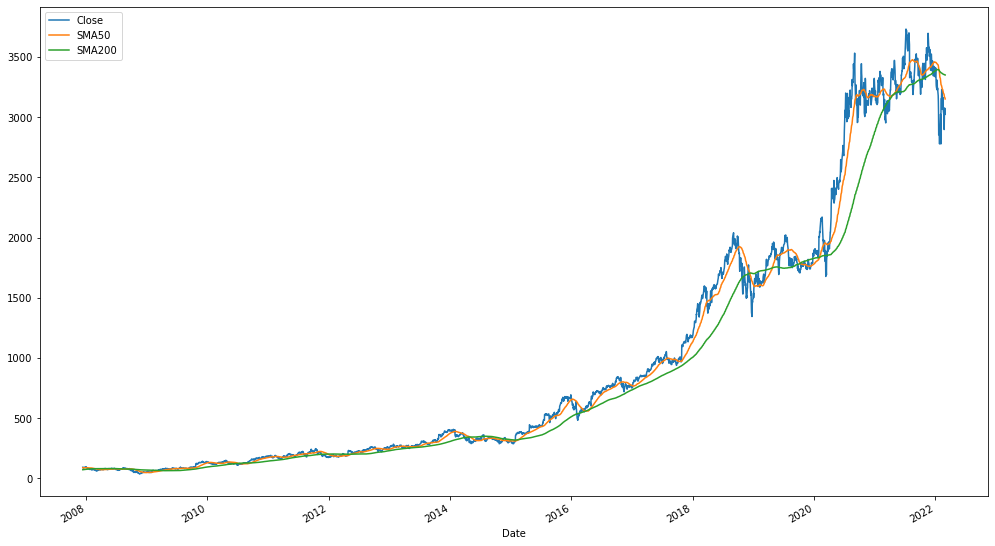

In [55]:
x_mv[['Close', 'SMA50', 'SMA200']].plot(figsize=(17, 10))

# Splitting the data

In [56]:
x_train_mv, x_test_mv, y_train_mv, y_test_mv = train_test_split(x_mv,y_mv,test_size = 0.2,random_state=40)

# KNN on Moving Averages

In [57]:
knn_ft_mv = knn.fit(x_train_mv, y_train_mv)

y_pred_mv = knn.predict(x_test_mv)                     

In [58]:
accuracy_test_mv = metrics.accuracy_score(y_test_mv, y_pred_mv)
cm_mv = confusion_matrix(y_test_mv, y_pred_mv)
# 0.9972067039106145 when considering only 'SMA50', 'SMA200'

# Random Forest on Moving Averages

In [59]:
rfc_ft_mv = rfc.fit(x_train_mv, y_train_mv)

y_rfc_pred_mv = rfc.predict(x_test_mv)

In [60]:
accuracy_test_mv_rfc = metrics.accuracy_score(y_test_mv, y_rfc_pred_mv)
cm_mv_rfc = confusion_matrix(y_test_mv, y_rfc_pred_mv)

# Gradient Boosting on Moving Averages

In [61]:
gbc_ft_mv = gbc.fit(x_train_mv, y_train_mv)

y_gbc_pred_mv = gbc.predict(x_test_mv)

In [62]:
accuracy_test_mv_gbc = metrics.accuracy_score(y_test_mv, y_gbc_pred_mv)
cm_mv_gbc = confusion_matrix(y_test_mv, y_gbc_pred_mv)

# Support Vector Machine on Moving Averages

In [63]:
svc_ft_mv = svc.fit(x_train_mv, y_train_mv)

y_svc_pred_mv = svc.predict(x_test_mv)

In [64]:
accuracy_test_mv_svc = metrics.accuracy_score(y_test_mv, y_svc_pred_mv)
cm_mv_svc = confusion_matrix(y_test_mv, y_svc_pred_mv)

# XGBoosting on Moving Averages

In [65]:
xgc_ft_mv = xgc.fit(x_train_mv, y_train_mv)

y_xgc_pred_mv = xgc.predict(x_test_mv)

[20:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
accuracy_test_mv_xgc = metrics.accuracy_score(y_test_mv, y_xgc_pred_mv)
cm_mv_xgb = confusion_matrix(y_test_mv, y_xgc_pred_mv)

In [67]:
print("Accuracy Score of Knn classifier is:\n", accuracy_test_mv)
print("Accuracy Score of Random Forest classifier is:\n", accuracy_test_mv_rfc)
print("Accuracy Score of Gradient Boosting classifier is:\n", accuracy_test_mv_gbc)
print("Accuracy Score of Support Vector Machine classifier is:\n", accuracy_test_mv_svc)
print("Accuracy Score of XGBoost classifier is:\n", accuracy_test_mv_xgc)

Accuracy Score of Knn classifier is:
 0.979050279329609
Accuracy Score of Random Forest classifier is:
 0.9818435754189944
Accuracy Score of Gradient Boosting classifier is:
 0.9860335195530726
Accuracy Score of Support Vector Machine classifier is:
 0.7835195530726257
Accuracy Score of XGBoost classifier is:
 0.9874301675977654


In [68]:
# Xgb > gb > rfc > knn > svm

In [69]:
print("Confusion Matrix of SMA Knn:\n", cm_mv)
print("Confusion Matrix of SMA Rfc:\n", cm_mv_rfc)
print("Confusion Matrix of SMA gbc:\n", cm_mv_gbc)
print("Confusion Matrix of SMA svc:\n", cm_mv_svc)
print("Confusion Matrix of SMA xgb:\n", cm_mv_xgb)

Confusion Matrix of SMA Knn:
 [[162   7]
 [  8 539]]
Confusion Matrix of SMA Rfc:
 [[158  11]
 [  2 545]]
Confusion Matrix of SMA gbc:
 [[160   9]
 [  1 546]]
Confusion Matrix of SMA svc:
 [[ 14 155]
 [  0 547]]
Confusion Matrix of SMA xgb:
 [[160   9]
 [  0 547]]


# Exponential Moving Averages

Exponential moving average (EMA) tells us the weighted mean of the previous K data points. EMA places a greater weight and significance on the most recent data points. The formula to calculate EMA at the time period t is:

In [70]:
azn_dta_emavg = amzn_data.copy()

In [71]:
azn_dta_emavg['EWMA50'] = azn_dta_emavg['Close'].ewm(span=50).mean()
azn_dta_emavg['EWMA200'] = azn_dta_emavg['Close'].ewm(span=200).mean()

In [72]:
azn_dta_emavg

,Open,High,Low,Close,Adj Close,Volume,EWMA50,EWMA200
Date,,,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800,37.689999,37.689999
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600,37.363599,37.368399
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200,37.785391,37.776312
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600,37.937775,37.924430
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300,37.972866,37.960250
...,...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,3158.311262,3275.390620
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,3153.168072,3272.920663
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,3150.132854,3270.958965


In [73]:
azn_dta_emavg.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
EWMA50       0
EWMA200      0
dtype: int64

In [74]:
x_emavg = azn_dta_emavg[['Open', 'High' , 'Low' , 'Close','EWMA50', 'EWMA200']]
x_emavg

,Open,High,Low,Close,EWMA50,EWMA200
Date,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,37.689999
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.363599,37.368399
2007-03-06,37.689999,38.660000,37.410000,38.580002,37.785391,37.776312
2007-03-07,38.680000,39.320000,38.279999,38.360001,37.937775,37.924430
2007-03-08,38.770000,39.220001,37.980000,38.099998,37.972866,37.960250
...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,3158.311262,3275.390620
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3153.168072,3272.920663
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3150.132854,3270.958965


In [75]:
azn_dta_emavg['amzn_bs_mv'] = np.where(azn_dta_emavg['EWMA50'] > azn_dta_emavg['EWMA200'], 1, -1)
azn_dta_emavg

,Open,High,Low,Close,Adj Close,Volume,EWMA50,EWMA200,amzn_bs_mv
Date,,,,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800,37.689999,37.689999,-1
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600,37.363599,37.368399,-1
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200,37.785391,37.776312,1
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600,37.937775,37.924430,1
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300,37.972866,37.960250,1
...,...,...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,3158.311262,3275.390620,-1
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,3153.168072,3272.920663,-1
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,3150.132854,3270.958965,-1


In [76]:
y_emavg = azn_dta_emavg[['amzn_bs_mv']]

<AxesSubplot:xlabel='Date'>

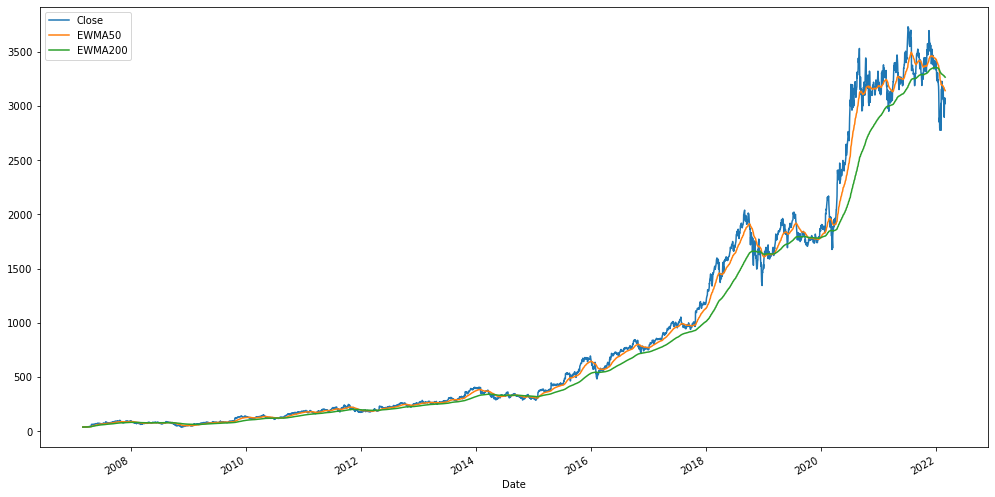

In [77]:
azn_dta_emavg[['Close', 'EWMA50', 'EWMA200']].plot(figsize=(17, 9))

# Splitting the data

In [78]:
x_train_emv, x_test_emv, y_train_emv, y_test_emv = train_test_split(x_emavg,y_emavg,test_size = 0.2,random_state=40)

# KNN on Exponential Mavg

In [79]:
knn_ft_emv = knn.fit(x_train_emv, y_train_emv)

y_pred_emv = knn.predict(x_test_emv)   

In [80]:
accuracy_test_emv = metrics.accuracy_score(y_test_emv, y_pred_emv)
cm_emv = confusion_matrix(y_test_emv, y_pred_emv)

# Random Forest on Exponential Mavg

In [81]:
rfc_ft_emv = rfc.fit(x_train_emv, y_train_emv)

y_rfc_pred_emv = rfc.predict(x_test_emv)

In [82]:
accuracy_test_emv_rfc = metrics.accuracy_score(y_test_emv, y_rfc_pred_emv)
cm_emv_rfc = confusion_matrix(y_test_emv, y_rfc_pred_emv)

# Gradient Boosting on Exponential Mavg

In [83]:
gbc_ft_emv = gbc.fit(x_train_emv, y_train_emv)

y_gbc_pred_emv = gbc.predict(x_test_emv)

In [84]:
accuracy_test_emv_gbc = metrics.accuracy_score(y_test_emv, y_gbc_pred_emv)
cm_emv_gbc = confusion_matrix(y_test_emv, y_gbc_pred_emv)

# Support Vector Machine on Exponential Mavg

In [85]:
svc_ft_emv = svc.fit(x_train_emv, y_train_emv)

y_svc_pred_emv = svc.predict(x_test_emv)

In [86]:
accuracy_test_emv_svc = metrics.accuracy_score(y_test_emv, y_svc_pred_emv)
cm_emv_svc = confusion_matrix(y_test_emv, y_svc_pred_emv)

# XGBoost on Exponential Mavg

In [87]:
xgc_ft_emv = xgc.fit(x_train_emv, y_train_emv)

y_xgc_pred_emv = xgc.predict(x_test_emv)

[20:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
accuracy_test_emv_xgc = metrics.accuracy_score(y_test_emv, y_xgc_pred_emv)
cm_emv_xgb = confusion_matrix(y_test_emv, y_xgc_pred_emv)

In [89]:
print("Accuracy Score of Knn classifier is:\n", accuracy_test_emv)
print("Accuracy Score of Random Forest classifier is:\n", accuracy_test_emv_rfc)
print("Accuracy Score of Gradient Boosting classifier is:\n", accuracy_test_emv_gbc)
print("Accuracy Score of Support Vector Machine classifier is:\n", accuracy_test_emv_svc)
print("Accuracy Score of XGBoost classifier is:\n", accuracy_test_emv_xgc)              

Accuracy Score of Knn classifier is:
 0.9854497354497355
Accuracy Score of Random Forest classifier is:
 0.9907407407407407
Accuracy Score of Gradient Boosting classifier is:
 0.9933862433862434
Accuracy Score of Support Vector Machine classifier is:
 0.83994708994709
Accuracy Score of XGBoost classifier is:
 0.9986772486772487


In [90]:
# Exponential ma > sma coz no need to drop used whole data
# xgb > gb > rfc > knn > svm

# SMAVG
# Xgb > gb > rfc > knn > svm

In [91]:
print("Confusion Matrix of EMA Knn:\n", cm_emv)
print("Confusion Matrix of EMA Rfc:\n", cm_emv_rfc)
print("Confusion Matrix of EMA gbc:\n", cm_emv_gbc)
print("Confusion Matrix of EMA svc:\n", cm_emv_svc)
print("Confusion Matrix of EMA xgb:\n", cm_emv_xgb)

Confusion Matrix of EMA Knn:
 [[115   6]
 [  5 630]]
Confusion Matrix of EMA Rfc:
 [[117   4]
 [  3 632]]
Confusion Matrix of EMA gbc:
 [[119   2]
 [  3 632]]
Confusion Matrix of EMA svc:
 [[  0 121]
 [  0 635]]
Confusion Matrix of EMA xgb:
 [[121   0]
 [  1 634]]


In [92]:
azn_dta_mavg_1 = amzn_data.copy()
azn_dta_mavg_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300
...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800


In [93]:
azn_dta_mavg_1['SMA50'] = azn_dta_mavg_1['Close'].rolling(50).mean()
azn_dta_mavg_1['SMA200'] = azn_dta_mavg_1['Close'].rolling(200).mean()
azn_dta_mavg_1

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200
Date,,,,,,,,
2007-03-02,38.320000,38.869999,37.689999,37.689999,37.689999,7787800,NaN,NaN
2007-03-05,37.150002,38.320000,37.040001,37.049999,37.049999,9565600,NaN,NaN
2007-03-06,37.689999,38.660000,37.410000,38.580002,38.580002,12848200,NaN,NaN
2007-03-07,38.680000,39.320000,38.279999,38.360001,38.360001,8644600,NaN,NaN
2007-03-08,38.770000,39.220001,37.980000,38.099998,38.099998,7629300,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,3179.262817,3352.863805
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,3171.979014,3351.880055
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,3165.857812,3351.499205


In [94]:
azn_dta_mavg_1.dropna(inplace = True)
azn_dta_mavg_1

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200
Date,,,,,,,,
2007-12-13,91.050003,93.000000,90.629997,92.400002,92.400002,6046300,88.174600,71.683000
2007-12-14,90.769997,91.239998,88.930000,89.080002,89.080002,6002300,88.111000,71.939950
2007-12-17,89.010002,89.059998,84.989998,85.089996,85.089996,7697700,87.944200,72.180150
2007-12-18,85.830002,87.459999,83.860001,86.889999,86.889999,7266100,87.765000,72.421700
2007-12-19,86.940002,89.949997,86.830002,89.379997,89.379997,7616200,87.646200,72.676800
...,...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,3179.262817,3352.863805
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,3171.979014,3351.880055
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,3165.857812,3351.499205


In [95]:
x_mavg_1 = azn_dta_mavg_1[['Open', 'High' , 'Low' , 'Close','SMA50', 'SMA200']]
x_mavg_1

,Open,High,Low,Close,SMA50,SMA200
Date,,,,,,
2007-12-13,91.050003,93.000000,90.629997,92.400002,88.174600,71.683000
2007-12-14,90.769997,91.239998,88.930000,89.080002,88.111000,71.939950
2007-12-17,89.010002,89.059998,84.989998,85.089996,87.944200,72.180150
2007-12-18,85.830002,87.459999,83.860001,86.889999,87.765000,72.421700
2007-12-19,86.940002,89.949997,86.830002,89.379997,87.646200,72.676800
...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,3179.262817,3352.863805
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3171.979014,3351.880055
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3165.857812,3351.499205


# Death Cross

In [96]:
azn_dta_mavg_1['amzn_bs_mv'] = np.where(azn_dta_mavg_1['SMA50'] < azn_dta_mavg_1['SMA200'], 1, -1)
azn_dta_mavg_1

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,amzn_bs_mv
Date,,,,,,,,,
2007-12-13,91.050003,93.000000,90.629997,92.400002,92.400002,6046300,88.174600,71.683000,-1
2007-12-14,90.769997,91.239998,88.930000,89.080002,89.080002,6002300,88.111000,71.939950,-1
2007-12-17,89.010002,89.059998,84.989998,85.089996,85.089996,7697700,87.944200,72.180150,-1
2007-12-18,85.830002,87.459999,83.860001,86.889999,86.889999,7266100,87.765000,72.421700,-1
2007-12-19,86.940002,89.949997,86.830002,89.379997,89.379997,7616200,87.646200,72.676800,-1
...,...,...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,2896.540039,3212200,3179.262817,3352.863805,1
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3027.159912,5039300,3171.979014,3351.880055,1
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,3165.857812,3351.499205,1


In [97]:
y_mavg_1 = azn_dta_emavg[['amzn_bs_mv']]

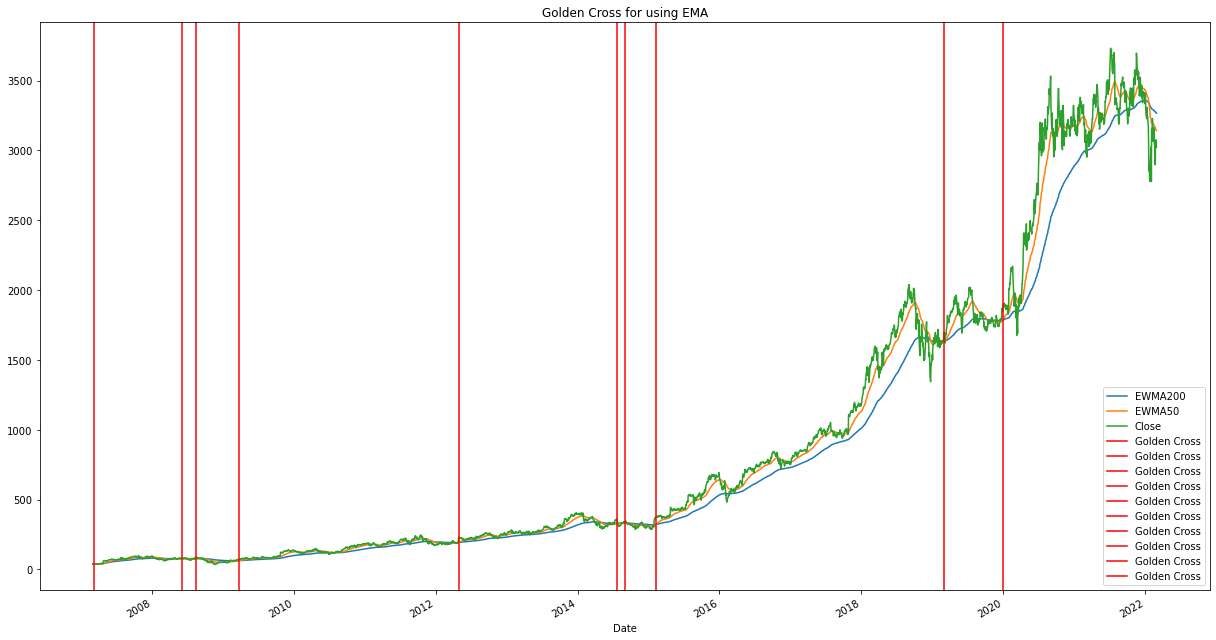

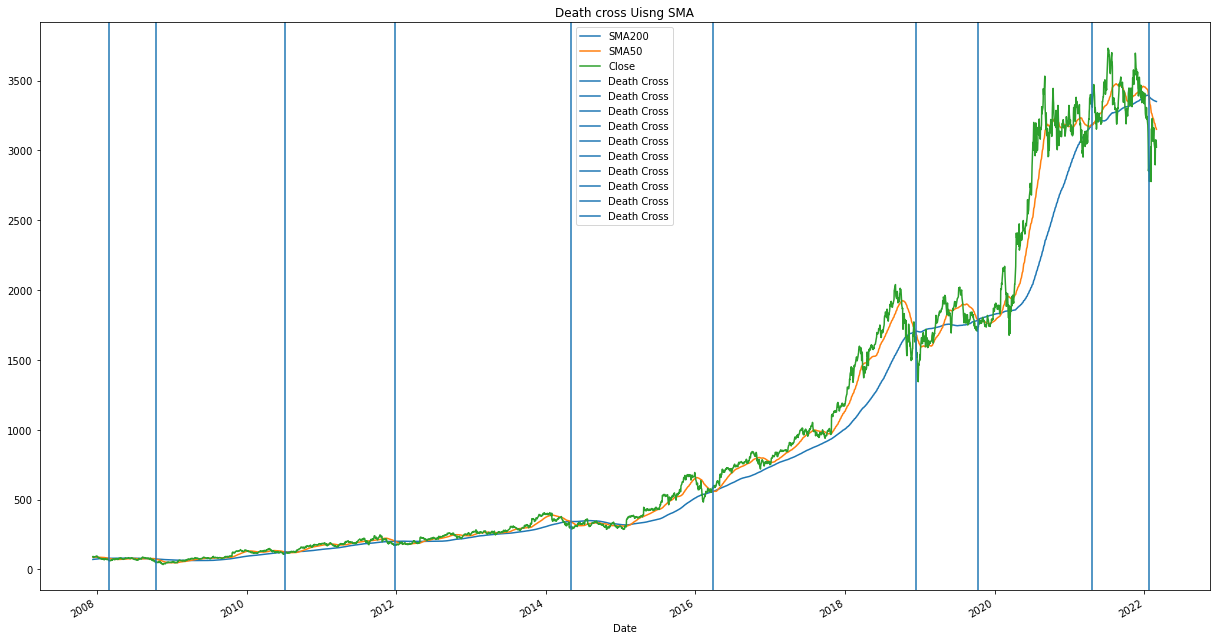

In [98]:
goldencross = []
golden_cross = False

deathcross = []
death_cross = False

# 50 SMA > 200 SMA Golden Cross 
for a, b in azn_dta_emavg['amzn_bs_mv'].iteritems():
    if b == 1:
        if golden_cross:
            goldencross.append(a)
            golden_cross = False
    else:
        golden_cross = True

fig, axes = plt.subplots(1,1, figsize=(6,4))
azn_dta_emavg[['EWMA200','EWMA50','Close']].plot(figsize=(17,9), title="Golden Cross for using EMA", ax=axes)

for b in goldencross:
    axes.axvline(x=b, label="Golden Cross", c="red")
    
axes.legend()
fig.tight_layout()



# 50 SMA < 200 SMA Death Cross
for a1, b1 in azn_dta_mavg_1['amzn_bs_mv'].iteritems():
    if b1 == 1:
        if death_cross:
            deathcross.append(a1)
            death_cross = False
    else:
        death_cross = True

fig, axes = plt.subplots(1,1, figsize=(6,4))
azn_dta_mavg_1[['SMA200','SMA50','Close']].plot(figsize=(17,9), title="Death cross Uisng SMA", ax=axes)

for b1 in deathcross:
    axes.axvline(x=b1, label="Death Cross")

axes.legend()
fig.tight_layout()

In [99]:
x_new = pd.DataFrame(azn_dta_mavg_1[['Open', 'High' , 'Low' , 'Close','SMA50', 'SMA200']])
x_new_1 = pd.DataFrame(azn_dta_emavg[['EWMA200','EWMA50']])
x_n = x_new.join(x_new_1)
x_n

,Open,High,Low,Close,SMA50,SMA200,EWMA200,EWMA50
Date,,,,,,,,
2007-12-13,91.050003,93.000000,90.629997,92.400002,88.174600,71.683000,79.638896,87.470045
2007-12-14,90.769997,91.239998,88.930000,89.080002,88.111000,71.939950,79.747372,87.533201
2007-12-17,89.010002,89.059998,84.989998,85.089996,87.944200,72.180150,79.808663,87.437359
2007-12-18,85.830002,87.459999,83.860001,86.889999,87.765000,72.421700,79.889777,87.415888
2007-12-19,86.940002,89.949997,86.830002,89.379997,87.646200,72.676800,79.998320,87.492934
...,...,...,...,...,...,...,...,...
2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,3179.262817,3352.863805,3275.390620,3158.311262
2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,3171.979014,3351.880055,3272.920663,3153.168072
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3165.857812,3351.499205,3270.958965,3150.132854


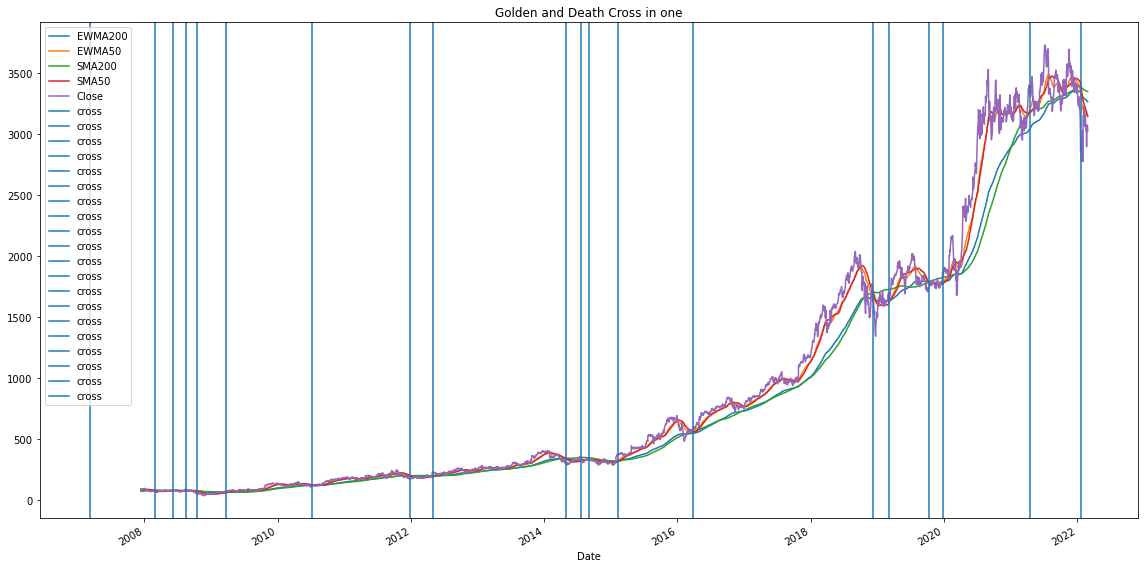

In [100]:
cross = []
first_cross = False

for c, d in azn_dta_emavg['amzn_bs_mv'].iteritems():
    if d == 1:
        if first_cross:
            cross.append(c)
            first_cross = False
    else:
        first_cross = True

for c1, d1 in azn_dta_mavg_1['amzn_bs_mv'].iteritems():
    if d1 == 1:
        if first_cross:
            cross.append(c1)
            first_cross = False
    else:
        first_cross = True

fig, axes = plt.subplots(1,1, figsize=(8,4))
x_n[['EWMA200','EWMA50','SMA200','SMA50','Close']].plot(figsize=(16,8), title="Golden and Death Cross in one", ax=axes)

for i in cross:
    axes.axvline(x=i, label="cross")

axes.legend()
fig.tight_layout()

# Tuning the Classiifers:

# Knn

In [101]:
knn_tn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance' ,p=50)

knn_ft_tn = knn_tn.fit(x_train_emv, y_train_emv)

y_pred_tn = knn.predict(x_test_emv)

In [102]:
accuracy_test_tn = metrics.accuracy_score(y_test_emv, y_pred_tn)
cm_tn = confusion_matrix(y_test_emv, y_pred_tn)

In [103]:
accuracy_test_tn

0.9854497354497355

In [104]:
cm_tn

array([[115,   6],
       [  5, 630]], dtype=int64)

# Random Forest

In [105]:
rfc_tn = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth=10)

rfc_ft_tn = rfc_tn.fit(x_train_emv, y_train_emv)

y_rfc_pred_tn = rfc_tn.predict(x_test_emv)

In [106]:
accuracy_test_tn_rfc = metrics.accuracy_score(y_test_emv, y_rfc_pred_tn)
accuracy_test_tn_rfc

0.9920634920634921

In [107]:
cm_tn_rfc = confusion_matrix(y_test_emv, y_rfc_pred_tn)
cm_tn_rfc

array([[117,   4],
       [  2, 633]], dtype=int64)